# TeaStore

Here we only study the behaviour of the login requests in the teastore application and look at how it scales on a single machine. 

In [18]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(tikzDevice)
library(gridExtra)
library(ggpubr)
library("ggsci")

In [14]:
setwd("/home/clem/Code/github.com/klementc/calvin-microbenchmarks/comparison/")

dataSG <- as_tibble(read.csv("./results_reprod/teastore/teastore_sg.csv"))
head(dataSG)
dataTS <- as_tibble(read.csv("./results_reprod/teastore/resTeaStoreCombined.csv"))
dataTS <- dataTS[dataTS$Load.Intensity != 0,] 
head(dataTS)

nbC,load,reqpersec
<int>,<int>,<int>
4,1,1
4,21,21
4,41,41
4,61,61
4,81,81
4,101,101


Sample,nbC,Target.Time,Load.Intensity,Successful.Transactions,Failed.Transactions,Dropped.Transactions,Avg.Response.Time,Final.Batch.Dispatch.Time,X18.05.2021.12.07.17444
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<lgl>
1,4,0.5,8,8,0,0,0.081,0.430,NA
1,4,1.5,16,16,0,0,0.030,1.482,NA
1,4,2.5,25,25,0,0,0.020,2.494,NA
1,4,3.5,33,33,0,0,0.012,3.503,NA
1,4,4.5,41,41,0,0,0.012,4.474,NA
1,4,5.5,50,49,0,0,0.011,5.489,NA


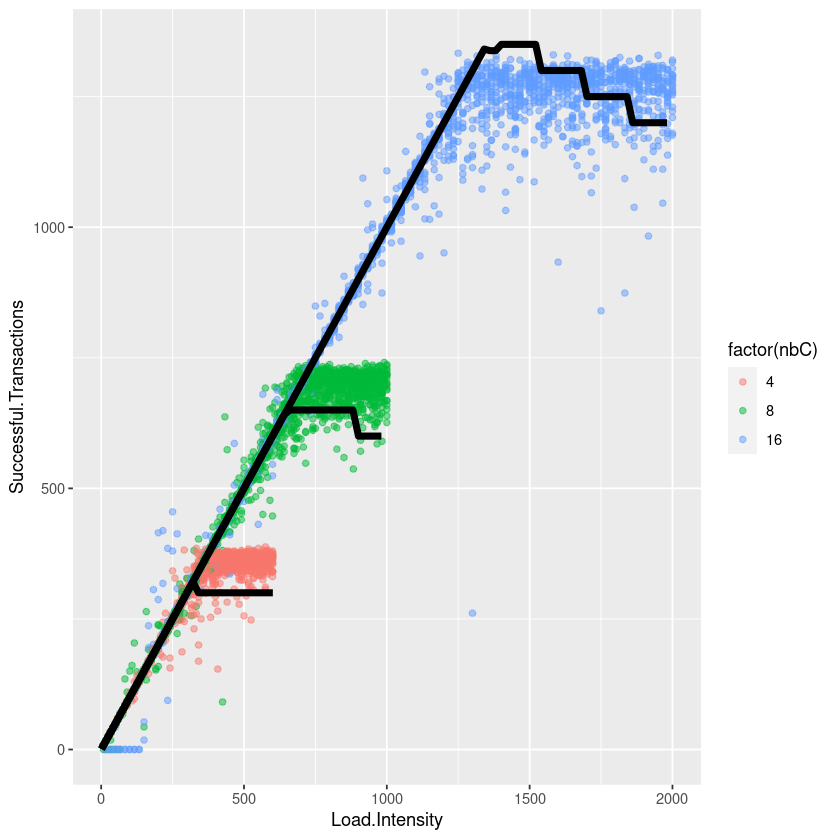

In [15]:

gc <- ggplot() +
  geom_point(data = dataTS, aes(x=Load.Intensity, y=Successful.Transactions,group=nbC,colour=factor(nbC)),alpha=.5)+
  geom_line(data = dataSG, aes(x=load, y=reqpersec, group=nbC),size=2)
gc

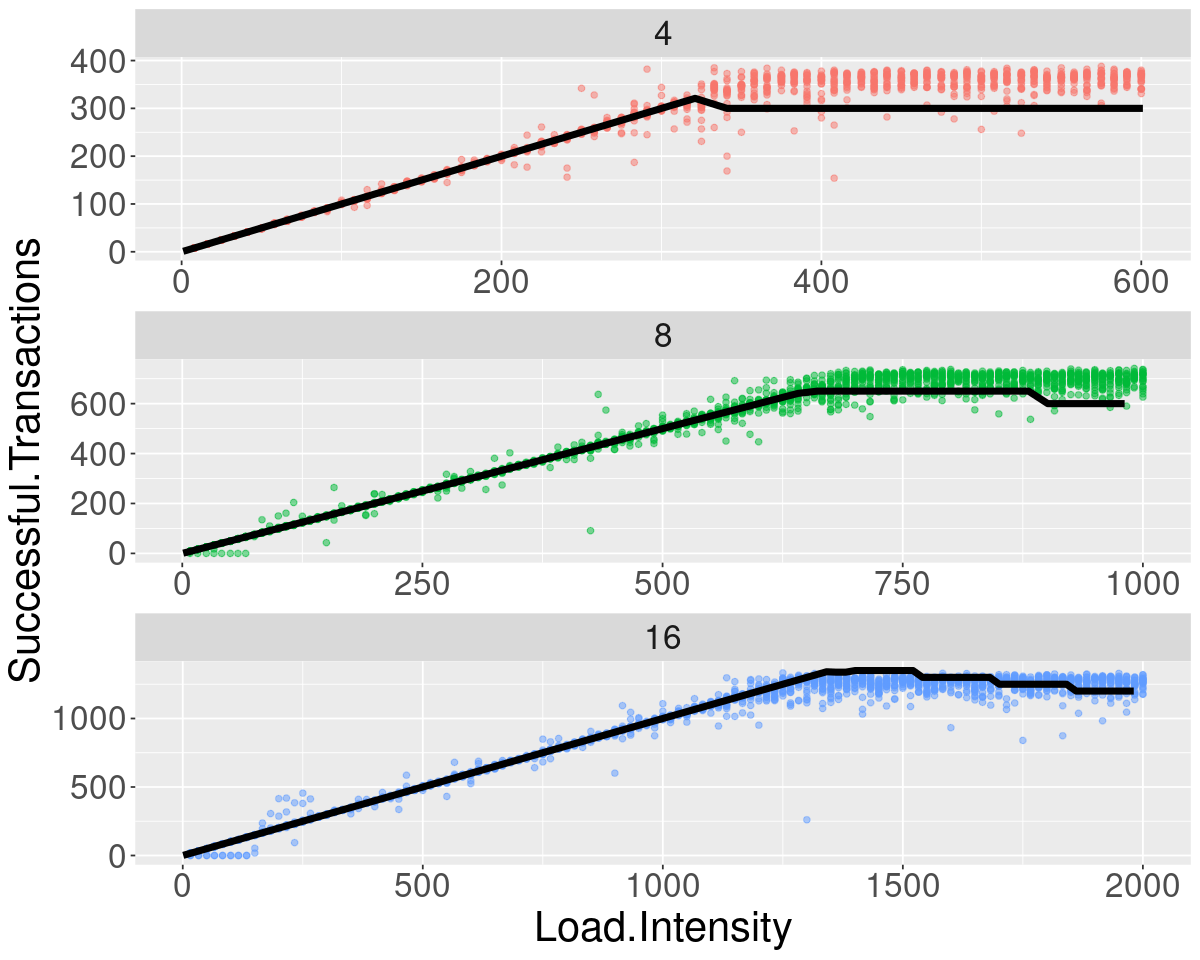

In [30]:
options(repr.plot.width=10, repr.plot.height=8)
gc <- ggplot() +
  #  geom_line(data = datasg, aes(x=load, y=reqPerSec, group=nbn, colour=factor(nbn), linetype="SG"),size=1.5)+
  geom_point(data = dataTS, aes(x=Load.Intensity, y=Successful.Transactions,group=nbC,colour=factor(nbC)),alpha=.5)+
  geom_line(data = dataSG, aes(x=load, y=reqpersec, group=nbC),size=2)+
  facet_wrap("nbC",ncol=1,scales="free")+ scale_fill_simpsons()+
  theme(text = element_text(size = 25))+theme(legend.position = "none")
gc
ggsave("plotTeaStore.pdf", plot=gc, width=10, height=8)